### 1. 연습문제 3.2

In [11]:
import numpy as np

def clgs(A : np.array):
    A = A.astype(np.float64)
    m, n = A.shape
    V = A
    Q = np.eye(m, n)
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j-1):
            R[i, j] = Q[:,i].T@A[:,j]
            V[:, j] = V[:, j] - R[i,j]*Q[:,i]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    return Q, R

def mgs(A : np.array):
    A = A.astype(np.float64)
    m, n = A.shape
    Q = A
    R = np.zeros((n,n))
    for i in range(n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:n] = Q[:,i].T@Q[:,i+1:n]
        Q[:,i+1:n] = Q[:,i+1:n] - Q[:,i].reshape(-1,1)@R[i,i+1:n].reshape(1,-1)
    R[n-1,n-1] = np.linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return Q, R

def qrhouse(A : np.array):
    A= A.astype(np.float64)
    m, n = A.shape
    R = A
    V = np.zeros((m,n))
    for k in range(min(m-1, n)):
        x = R[k:m, k]
        v = x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x), 1).squeeze(-1)
        V[k:m, k] = v
        R[k:m, k:n] = R[k:m, k:n] - (2*v).reshape(-1, 1)@((v.T@R[k:m, k:n])/(v.T@v)).reshape(1,-1)
    R = np.triu(R[:m,:n])
    return V, R

def formQ(V : np.array):
    V = V.astype(np.float64)
    m, n = V.shape
    Q = np.eye(m)
    for j in range(min(m-1,n)-1, -1, -1):
        v = V[:,j]
        Q = Q - (2*v).reshape(-1,1)@((v.T@Q)/(v.T@v)).reshape(1,-1)
    return Q

# codes for test
ex = np.array([[2, 1, 7],
               [3, 5, 2],
               [1, 7, 3],
               [1, 2, 0]])

Q, R = clgs(ex)
print("*"*50)
print(Q.T@Q)
print("")
print(R)
print("")
print(Q@R)

Q, R = mgs(ex)
print("*"*50)
print(Q.T@Q)
print("")
print(R)
print("")
print(Q@R)

V, R = qrhouse(ex)
Q = formQ(V)
print("*"*50)
print(Q.T@Q)
print("")
print(R)
print("")
print(Q@R)

**************************************************
[[ 1.00000000e+00  7.55290762e-01 -1.11022302e-16]
 [ 7.55290762e-01  1.00000000e+00 -4.06187608e-02]
 [-1.11022302e-16 -4.06187608e-02  1.00000000e+00]]

[[3.87298335 0.         5.93857446]
 [0.         8.88819442 0.        ]
 [0.         0.         5.17042874]]

[[ 2.0000000e+00  1.0000000e+00  7.0000000e+00]
 [ 3.0000000e+00  5.0000000e+00  2.0000000e+00]
 [ 1.0000000e+00  7.0000000e+00  3.0000000e+00]
 [ 1.0000000e+00  2.0000000e+00 -1.2768118e-16]]
**************************************************
[[ 1.00000000e+00  2.10182666e-16 -5.55111512e-17]
 [ 2.10182666e-16  1.00000000e+00  9.97465999e-18]
 [-5.55111512e-17  9.97465999e-18  1.00000000e+00]]

[[ 3.87298335  6.71317113  5.93857446]
 [ 0.          5.82523247 -0.32044501]
 [ 0.          0.          5.16048916]]

[[2.00000000e+00 1.00000000e+00 7.00000000e+00]
 [3.00000000e+00 5.00000000e+00 2.00000000e+00]
 [1.00000000e+00 7.00000000e+00 3.00000000e+00]
 [1.00000000e+00 2.000

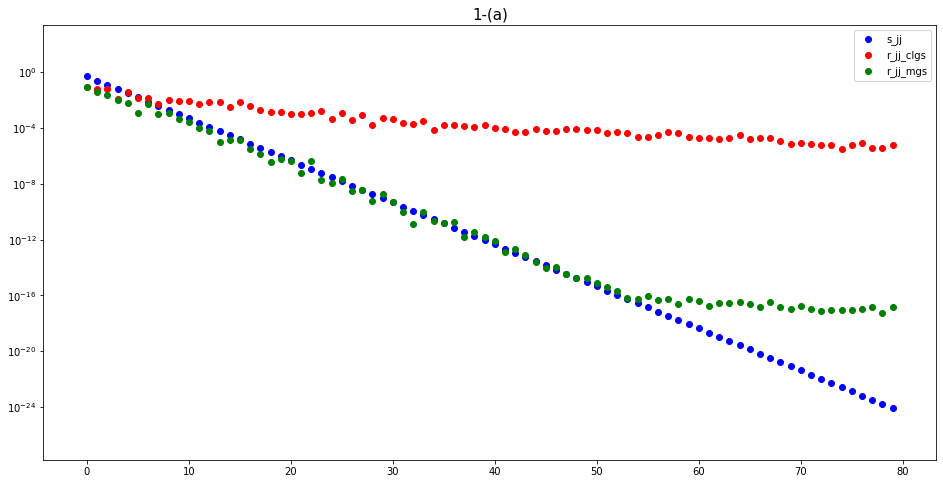

Modified one이 더 안정적입니다..


In [116]:
# (a)
import matplotlib.pyplot as plt

U, X = np.linalg.qr(np.random.randn(80, 80))
V, X = np.linalg.qr(np.random.randn(80, 80))
J = np.arange(1, 81)
S = np.diag(2.**(-J))
A = U@S@V
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

f1 = plt.figure(figsize=(16, 8))
plt.title('1-(a)', fontsize=15)
plt.yscale('log')
plt.scatter(np.arange(80), np.diag(S), c='b', label='s_jj')
plt.scatter(np.arange(80), np.diag(Rc), c='r', label='r_jj_clgs')
plt.scatter(np.arange(80), np.diag(Rm), c='g', label='r_jj_mgs')
plt.legend()
plt.show()

print("Modified one이 더 안정적입니다..")

In [117]:
# (b)
A = np.array([.70000, .70711, .70001, .70711]).reshape(2,2)
V, R = qrhouse(A); Q=formQ(V)
Qm, Rm = mgs(A)
print(np.linalg.norm(Q.T@Q - np.eye(2)))
print(np.linalg.norm(Qm.T@Qm - np.eye(2)))
print("하우스홀더가 더 안정적입니다.")

5.787252299533512e-16
3.254726094493924e-11
하우스홀더가 더 안정적입니다.


### 2. 연습문제 3.3

In [118]:
import numpy as np

def reducedQR(A : np.array):
    A.astype(np.float64)
    m, n = A.shape
    G = np.eye(m)
    for j in range(n):
        for i in range(m-1, j, -1):
            G_ = np.eye(m)
            x1 = A[j,j]
            x2 = A[i,j]
            theta = np.arctan(x2/x1)
            G_[j,j] = np.cos(theta)
            G_[j,i] = np.sin(theta)
            G_[i,j] = -np.sin(theta)
            G_[i,i] = np.cos(theta)
            A = G_@A
            G = G@G_.T
    Q = G
    R = A
    return Q, R

In [119]:
ex = np.array([[2, 1, 7],
               [3, 5, 2],
               [1, 7, 3],
               [1, 2, 0]])

Q, R = reducedQR(ex)
print(Q.T@Q)
print("")
print(R)
print("")
print(Q@R)

[[ 1.00000000e+00 -2.84449203e-17 -4.51857310e-17  4.42512460e-18]
 [-2.84449203e-17  1.00000000e+00 -6.66301411e-17 -3.03599499e-18]
 [-4.51857310e-17 -6.66301411e-17  1.00000000e+00  5.93234839e-17]
 [ 4.42512460e-18 -3.03599499e-18  5.93234839e-17  1.00000000e+00]]

[[ 3.87298335e+00  6.71317113e+00  5.93857446e+00]
 [ 2.41077656e-17 -5.82523247e+00  3.20445008e-01]
 [-3.55268379e-16  2.81576517e-17  5.16048916e+00]
 [ 2.65364694e-16  3.45179315e-17 -1.19489028e-16]]

[[ 2.00000000e+00  1.00000000e+00  7.00000000e+00]
 [ 3.00000000e+00  5.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00  7.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00 -5.68594739e-16]]


### 3. 연습문제 4.3

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

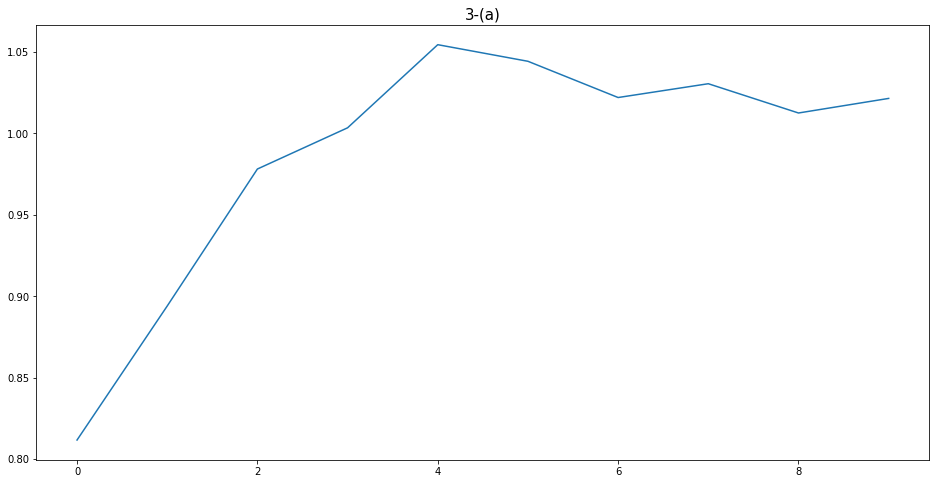

In [44]:
# (a)
radius_history = []

for i in range(10):
    m = 2**(i+3)
    matrix = np.random.normal(0, m**(-0.5), (m, m))
    radius = np.max(np.abs(np.linalg.eigvals(matrix)))
    radius_history.append(radius)

f1 = plt.figure(figsize=(16, 8))
plt.title('3-(a)', fontsize=15)
plt.plot(np.arange(10), radius_history)
plt.show()

M이 증가할 수록 1에 가까워지는 모습이 관찰됩니다.

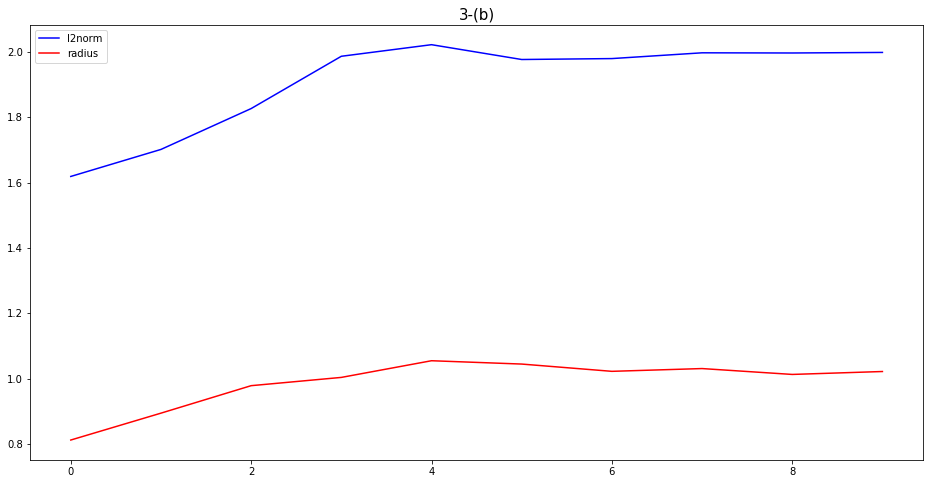

In [45]:
# (b)
l2norm_history = []
for i in range(10):
    m = 2**(i+3)
    matrix = np.random.normal(0, m**(-0.5), (m, m))
    l2norm = np.linalg.norm(matrix, ord=2)
    l2norm_history.append(l2norm)

f1 = plt.figure(figsize=(16, 8))
plt.title('3-(b)', fontsize=15)
plt.plot(np.arange(10), l2norm_history, c='b', label='l2norm')
plt.plot(np.arange(10), radius_history, c='r', label='radius')
plt.legend()
plt.show()

l2 norm의 경우 M이 커질수록 2로 가까워지는 모습을 확인할 수 있으며 부등식은 항상 성립하며 등호성립조건에서 점점 멀어집니다.

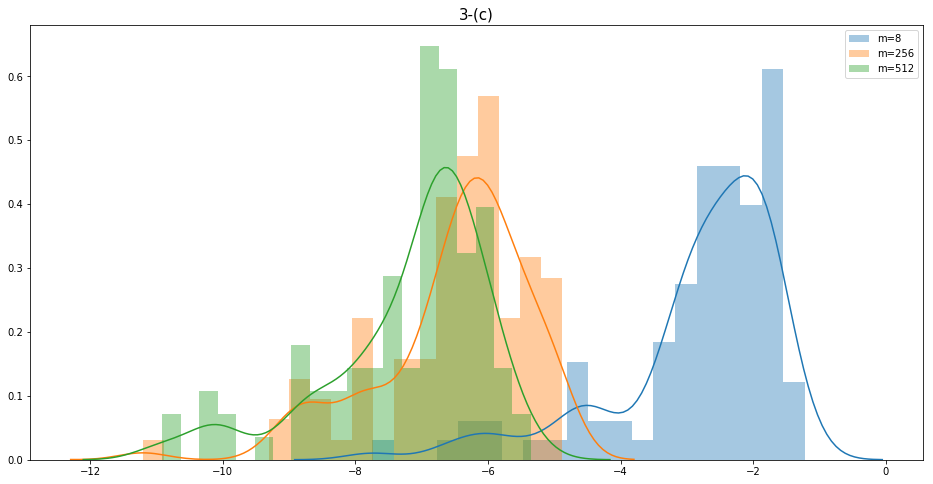

In [46]:
# (c)
f1 = plt.figure(figsize=(16, 8))
plt.title('3-(c)', fontsize=15)
for i in [8, 256, 512]:
    svalue_history = []
    for j in range(100):
        matrix = np.random.normal(0, i**(-0.5), (i, i))
        svalue = np.log(np.min((np.linalg.svd(matrix, compute_uv = False))))
        svalue_history.append(svalue)
    sns.distplot(svalue_history, bins=20, label=f'm={i}')

plt.legend()
plt.show()

M의 값이 커질 수록 전체적으로 분포가 왼쪽(작은 값)으로 치우치는 것을 확인할 수 있습니다.

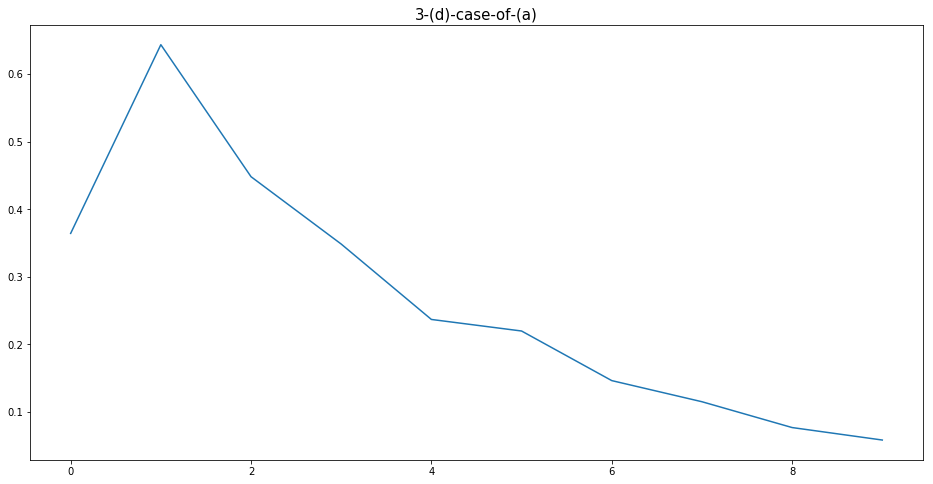

In [47]:
# (d) - case of (a)
radius_history = []

for i in range(10):
    m = 2**(i+3)
    matrix = np.triu(np.random.normal(0, m**(-0.5), (m, m)))
    radius = np.max(np.abs(np.linalg.eigvals(matrix)))
    radius_history.append(radius)

f1 = plt.figure(figsize=(16, 8))
plt.title('3-(d)-case-of-(a)', fontsize=15)
plt.plot(np.arange(10), radius_history)
plt.show()

M이 증가할수록 0에 가까워지는 모습이 관찰됩니다.

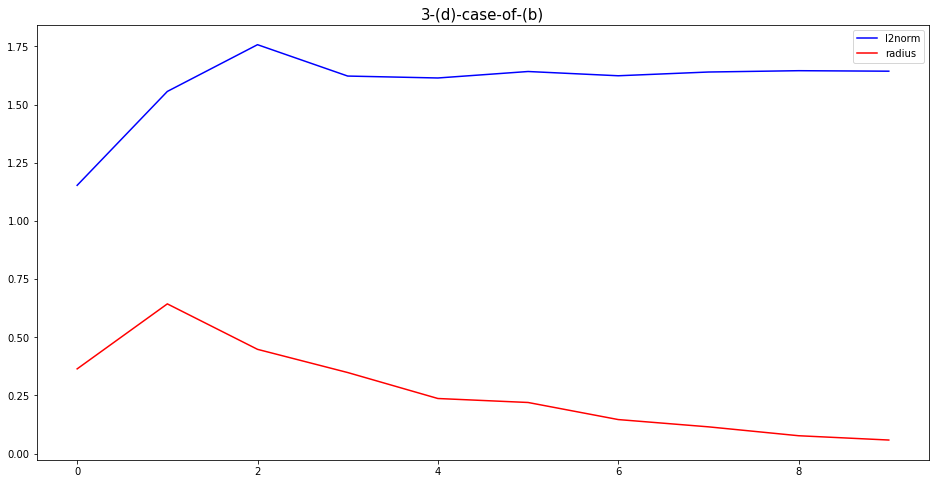

In [50]:
# (d) - case of (b)
l2norm_history = []
for i in range(10):
    m = 2**(i+3)
    matrix = np.triu(np.random.normal(0, m**(-0.5), (m, m)))
    l2norm = np.linalg.norm(matrix, ord=2)
    l2norm_history.append(l2norm)

f1 = plt.figure(figsize=(16, 8))
plt.title('3-(d)-case-of-(b)', fontsize=15)
plt.plot(np.arange(10), l2norm_history, c='b', label='l2norm')
plt.plot(np.arange(10), radius_history, c='r', label='radius')
plt.legend()
plt.show()

l2 norm의 경우 M이 커질수록 1.6에 가까워지는 모습을 확인할 수 있으며 부등식은 항상 성립하며 등호성립조건에서 점점 멀어집니다.

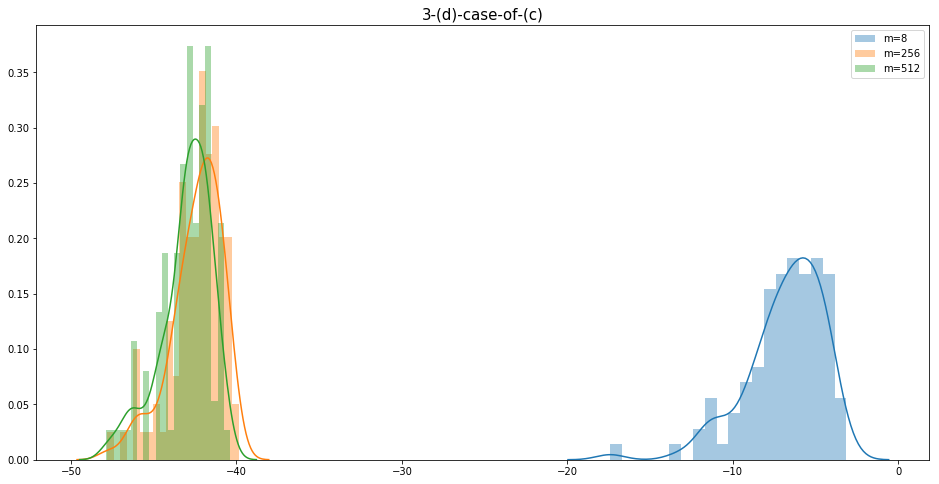

In [51]:
# (c)
f1 = plt.figure(figsize=(16, 8))
plt.title('3-(d)-case-of-(c)', fontsize=15)
for i in [8, 256, 512]:
    svalue_history = []
    for j in range(100):
        matrix = np.triu(np.random.normal(0, i**(-0.5), (i, i)))
        svalue = np.log(np.min((np.linalg.svd(matrix, compute_uv = False))))
        svalue_history.append(svalue)
    sns.distplot(svalue_history, bins=20, label=f'm={i}')

plt.legend()
plt.show()

Full Matrix 때와 마찬가지로 M이 증가할 수록 분포가 왼쪽(작은 값)으로 치우치는 것을 확인할 수 있습니다. 차이점은 값의 스케일이 훨씬 더 작아졌으며 M=8과 같이 작을 때와 M=256 그리고 512로 클 때의 분포 차이가 더 많이 난다는 것입니다. 

### 4. 연습문제 4.6

In [61]:
import numpy as np
m = 50
n = 12
t = np.linspace(0, 1, m)
A = np.fliplr(np.vander(t, n))
b = np.cos(4*t)

In [62]:
#(a)
def normal_equation_python(A : np.array, b : np.array):
    return np.dot(np.linalg.inv(A.T@A), A.T@b)

print(normal_equation_python(A, b))

[ 0.99206055  0.10413885 -8.20565796  0.25585938  9.9296875   1.3828125
 -6.890625    0.40625     1.8125     -0.15625    -0.28125     0.07226562]


In [63]:
#(b)
def back_subs(A : np.array, b : np.array):
    R = A
    y = b
    
    n = A.shape[0]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(R[i,i+1:n], x[i+1:n]))/R[i,i]
        
    return x

def normal_equation_mgs(A : np.array, b : np.array):
    Q, R = mgs(A)
    return back_subs(R, Q.T@b)

print(normal_equation_mgs(A, b))

[ 1.00000000e+00 -7.80741832e-07 -7.99996781e+00 -5.16377001e-04
  1.06709431e+01 -2.06445280e-02 -5.62772565e+00 -1.10758969e-01
  1.73549472e+00 -2.48104570e-02 -3.61374792e-01  8.57179143e-02]


In [64]:
#(c)
def Qtb(V : np.array, b : np.array):
    m, n = V.shape
    for j in range(min(m-1, n)):
        v = V[j:m, j].reshape(-1,1)
        b[j:m] = b[j:m] - (2*v)@(v.T@b[j:m])/(v.T@v)
    c = b
    return c

def normal_equation_qrhouse(A : np.array, b : np.array):
    V, R = qrhouse(A)
    c = Qtb(V, b)
    return np.linalg.solve(R.T@R, R.T@c)

print(normal_equation_qrhouse(A, b))

[ 1.00000001e+00 -3.93939791e-06 -7.99984887e+00 -2.27242308e-03
  1.06844083e+01 -8.14905376e-02 -5.45502250e+00 -4.27331150e-01
  2.10983508e+00 -3.00552406e-01 -2.46307595e-01  6.49423931e-02]


In [65]:
#(d)
def back_subs(A : np.array, b : np.array):
    R = A
    y = b
    
    n = A.shape[0]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(R[i,i+1:n], x[i+1:n]))/R[i,i]
        
    return x

def normal_equation_python_qr(A : np.array, b : np.array):
    Q, R = np.linalg.qr(A)
    return back_subs(R, Q.T@b)

print(normal_equation_python_qr(A, b))

[ 4.84246863e-01 -2.96105475e+02  9.39004140e+03 -1.19630693e+05
  8.16225372e+05 -3.35956061e+06  8.83742713e+06 -1.52096502e+07
  1.70552834e+07 -1.20066287e+07  4.81820937e+06 -8.40769701e+05]


In [66]:
#(e)
def normal_equation_solve_python(A : np.array, b : np.array):
    return np.linalg.solve(A.T@A, A.T@b)

print(normal_equation_solve_python(A, b))

[ 5.20214779e-01 -3.06651382e+02  9.78529939e+03 -1.25445611e+05
  8.60685194e+05 -3.55998235e+06  9.40514395e+06 -1.62484930e+07
  1.82818502e+07 -1.29089428e+07  5.19431112e+06 -9.08605946e+05]


In [67]:
#(f)
def normal_equation_solve_svd(A : np.array, b : np.array):
    U, S, V = np.linalg.svd(A.T@A)
    y = U.T@A.T@b
    n = y.shape[0]
    for i in range(n):
        y[i] = y[i] / S[i]
    return np.dot(V.T, y)

print(normal_equation_solve_svd(A, b))

[ 4.98708247e-01 -3.00426716e+02  9.55330858e+03 -1.22047573e+05
  8.34799851e+05 -3.44366240e+06  9.07656688e+06 -1.56487136e+07
  1.75752313e+07 -1.23901406e+07  4.97844593e+06 -8.69733327e+05]


In [69]:
#(g)

print("L2 Norm을 각 방법에 대해서 비교함으로서 안정성을 확인해보겠습니다.")
print("(a) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_python(A, b))))
print("(b) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_mgs(A, b))))
print("(c) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_qrhouse(A, b))))
print("(d) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_python_qr(A, b))))
print("(e) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_solve_python(A, b))))
print("(f) : " + str(np.linalg.norm(A.T@b - A.T@A@normal_equation_solve_svd(A, b))))

L2 Norm을 각 방법에 대해서 비교함으로서 안정성을 확인해보겠습니다.
(a) : 0.9522934556726346
(b) : 3.839069977553586e-08
(c) : 4.288142422566116e-08
(d) : 7.313747856787919e-08
(e) : 3.455275254223577e-08
(f) : 7.234922637472881e-08
